# Visualisations of clusters and HDBSCAN models

In [1]:
import pickle
import hdbscan
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
import matplotlib.pyplot as plt
from openTSNE import TSNE
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (5, 5)

In [5]:
# load cluster embeddings
modelling_tsne_data_sentences50 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_sentence50.npy')
modelling_tsne_data_sentences100 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_sentence100.npy')
modelling_tsne_data_words50 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_word50.npy')
modelling_tsne_data_words100 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_word100.npy')

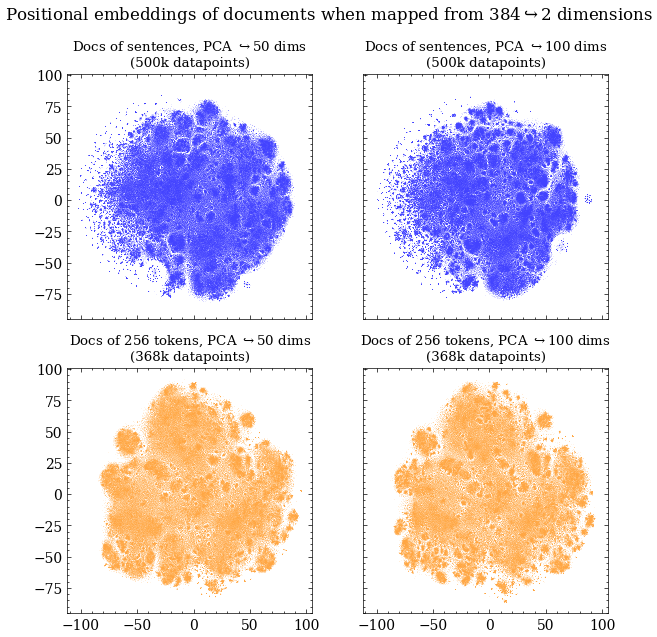

In [100]:
fig, axs = plt.subplots(2,2, figsize=(7,7), sharex=True, sharey=True)
plt.suptitle('Positional embeddings of documents when mapped from $384 \hookrightarrow 2$ dimensions', horizontalalignment='center')

sns.scatterplot(x = modelling_tsne_data_sentences50[:,0], y=modelling_tsne_data_sentences50[:,1], legend=False, s=0.05, ax=axs[0,0], color='blue')
sns.scatterplot(x = modelling_tsne_data_sentences100[:,0], y=modelling_tsne_data_sentences100[:,1], legend=False, s=0.05, ax=axs[0,1], color='blue')
sns.scatterplot(x = modelling_tsne_data_words50[:,0], y=modelling_tsne_data_words50[:,1], legend=False, s=0.05, ax=axs[1,0], color='darkorange')
sns.scatterplot(x = modelling_tsne_data_words100[:,0], y=modelling_tsne_data_words100[:,1], legend=False, s=0.05, ax=axs[1,1], color='darkorange')
axs[0,0].set_box_aspect(1)
axs[0,1].set_box_aspect(1)
axs[1,0].set_box_aspect(1)
axs[1,1].set_box_aspect(1)
plt.rcParams.update({'font.size': 8})  # decrease font size
axs[0,0].set_title("Docs of sentences, PCA $\hookrightarrow 50$ dims\n(500k datapoints)")
axs[0,1].set_title("Docs of sentences, PCA $\hookrightarrow 100$ dims\n(500k datapoints)")
axs[1,0].set_title("Docs of 256 tokens, PCA $\hookrightarrow 50$ dims\n(368k datapoints)")
axs[1,1].set_title("Docs of 256 tokens, PCA $\hookrightarrow 100$ dims\n(368k datapoints)")
plt.rcParams.update({'font.size': 10})  # return to normal font size

plt.show()

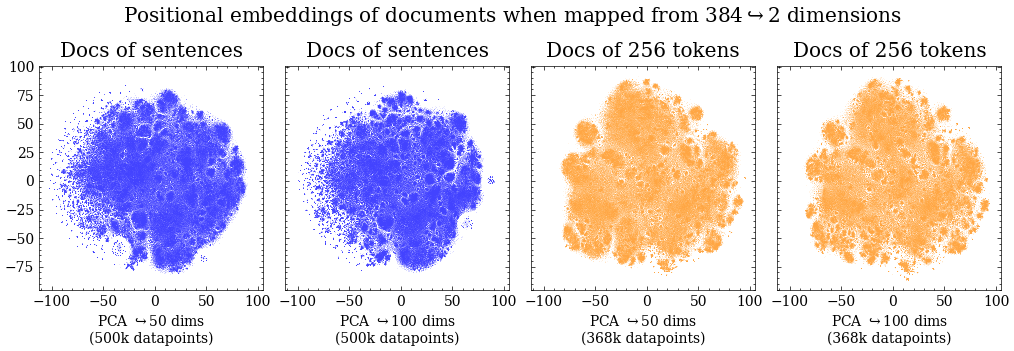

In [103]:
fig, axs = plt.subplots(1,4, figsize=(10, 3.5), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 12})  # increase font size
plt.suptitle('Positional embeddings of documents when mapped from $384 \hookrightarrow 2$ dimensions')

fig.tight_layout(pad =0)

sns.scatterplot(x = modelling_tsne_data_sentences50[:,0], y=modelling_tsne_data_sentences50[:,1], legend=False, s=0.05, ax=axs[0], color='blue')
sns.scatterplot(x = modelling_tsne_data_sentences100[:,0], y=modelling_tsne_data_sentences100[:,1], legend=False, s=0.05, ax=axs[1], color='blue')
sns.scatterplot(x = modelling_tsne_data_words50[:,0], y=modelling_tsne_data_words50[:,1], legend=False, s=0.05, ax=axs[2], color='darkorange')
sns.scatterplot(x = modelling_tsne_data_words100[:,0], y=modelling_tsne_data_words100[:,1], legend=False, s=0.05, ax=axs[3], color='darkorange')
axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)
axs[2].set_box_aspect(1)
axs[3].set_box_aspect(1)

axs[0].set_title("Docs of sentences")
axs[1].set_title("Docs of sentences")
axs[2].set_title("Docs of 256 tokens")
axs[3].set_title("Docs of 256 tokens")

axs[0].set_xlabel("PCA $\hookrightarrow 50$ dims\n(500k datapoints)")
axs[1].set_xlabel("PCA $\hookrightarrow 100$ dims\n(500k datapoints)")
axs[2].set_xlabel("PCA $\hookrightarrow 50$ dims\n(368k datapoints)")
axs[3].set_xlabel("PCA $\hookrightarrow 100$ dims\n(368k datapoints)")
plt.rcParams.update({'font.size': 10})  # decrease font size
plt.show()

In [2]:
# open cluster models
with open('../Thesis/Final_models/hdbscan_msize15.pkl', 'rb') as inp:
    hdbscan_15 = pickle.load(inp)

with open('../Thesis/Final_models/hdbscan_msize50.pkl', 'rb') as inp:
    hdbscan_50 = pickle.load(inp)

with open('../Thesis/Final_models/hdbscan_msize200.pkl', 'rb') as inp:
    hdbscan_200 = pickle.load(inp)

# check
print(len(hdbscan_15.labels_))
print(len(hdbscan_50.labels_))
print(len(hdbscan_200.labels_))

368835
368835
368835


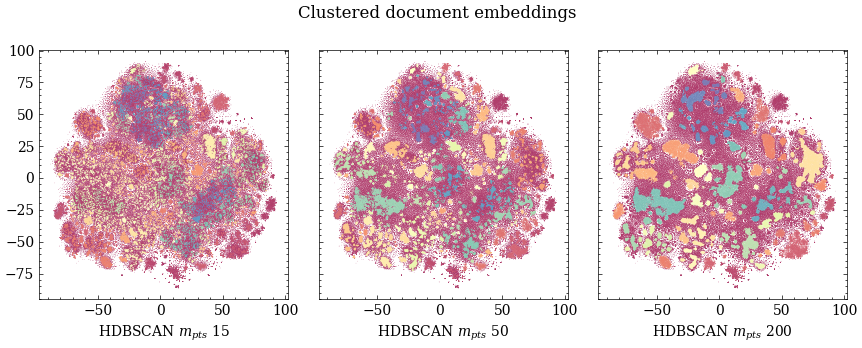

In [109]:
# plot clusters
fig, axs = plt.subplots(1,3, figsize=(8.5,3.5), sharex=True, sharey=True)
plt.suptitle('Clustered document embeddings')
fig.tight_layout(pad=0)

sns.scatterplot(x = modelling_tsne_data_words100[:,0], y=modelling_tsne_data_words100[:,1],\
                 hue=hdbscan_15.labels_, legend=False, s=0.1, palette='Spectral', ax=axs[0])
sns.scatterplot(x = modelling_tsne_data_words100[:,0], y=modelling_tsne_data_words100[:,1],\
                 hue=hdbscan_50.labels_, legend=False, s=0.1, palette='Spectral', ax=axs[1])
sns.scatterplot(x = modelling_tsne_data_words100[:,0], y=modelling_tsne_data_words100[:,1],\
                 hue=hdbscan_200.labels_, legend=False, s=0.1, palette='Spectral', ax=axs[2])

axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)
axs[2].set_box_aspect(1)
axs[0].set_xlabel("HDBSCAN $m_{pts}$ 15")
axs[1].set_xlabel("HDBSCAN $m_{pts}$ 50")
axs[2].set_xlabel("HDBSCAN $m_{pts}$ 200")
plt.show()

In [126]:
# make DFs to filter out noise
mpts15 = pd.DataFrame(modelling_tsne_data_words100, hdbscan_15.labels_)
mpts15_noout = mpts15[mpts15.index != -1]
mpts50 = pd.DataFrame(modelling_tsne_data_words100, hdbscan_50.labels_)
mpts50_noout = mpts50[mpts50.index != -1]
mpts200 = pd.DataFrame(modelling_tsne_data_words100, hdbscan_200.labels_)
mpts200_noout = mpts200[mpts200.index != -1]

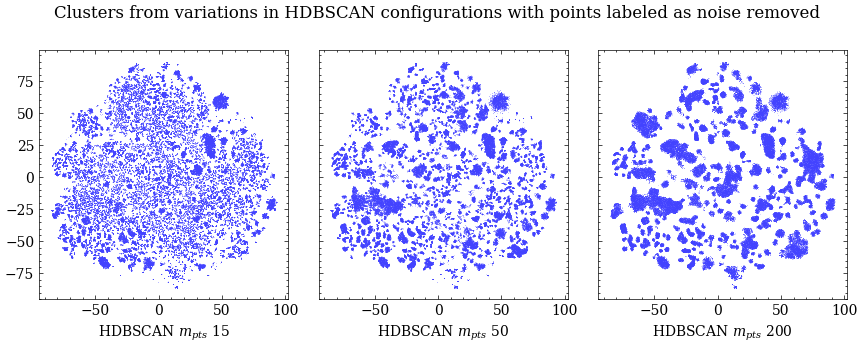

In [138]:
# plot clusters
fig, axs = plt.subplots(1,3, figsize=(8.5,3.5), sharex=True, sharey=True)
plt.suptitle('Clusters from variations in HDBSCAN configurations with points labeled as noise removed')
fig.tight_layout(pad=0)

sns.scatterplot(x = mpts15_noout[0], y=mpts15_noout[1], legend=False, s=0.1, color='blue', ax=axs[0])
sns.scatterplot(x = mpts50_noout[0], y=mpts50_noout[1], legend=False, s=0.1, color='blue', ax=axs[1])
sns.scatterplot(x = mpts200_noout[0], y=mpts200_noout[1], legend=False, s=0.1, color='blue', ax=axs[2])
axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)
axs[2].set_box_aspect(1)
axs[0].set_ylabel("")
axs[0].set_xlabel("HDBSCAN $m_{pts}$ 15")
axs[1].set_xlabel("HDBSCAN $m_{pts}$ 50")
axs[2].set_xlabel("HDBSCAN $m_{pts}$ 200")
plt.show()

In [141]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(mpts15_noout.values, mpts15_noout.index)

0.43146797958735933

In [143]:
silhouette_score(mpts50_noout.values, mpts50_noout.index)

0.35674258212551696

In [142]:
silhouette_score(mpts200_noout.values, mpts200_noout.index)

0.36248877715742756

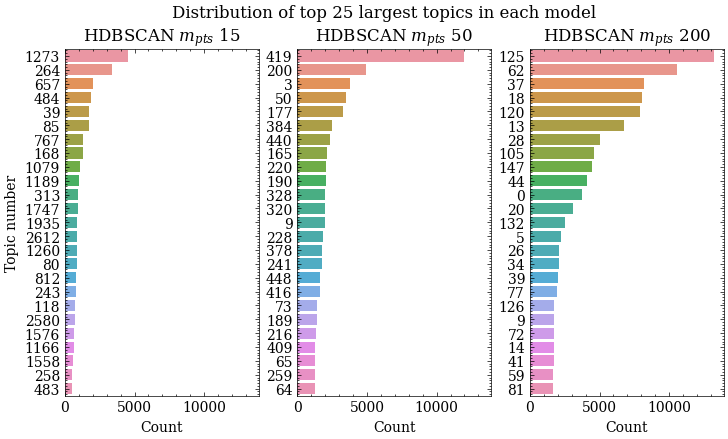

In [3]:
# plot topic distributions of all models
hdbscan_df = pd.DataFrame({'cluster_label_15':hdbscan_15.labels_,
                           'cluster_label_50':hdbscan_50.labels_,
                           'cluster_label_200':hdbscan_200.labels_})

# HDBSCAN results dataframe without outliers
hdbscan_df_noout15 = hdbscan_df[hdbscan_df.cluster_label_15 != -1]
hdbscan_df_noout50 = hdbscan_df[hdbscan_df.cluster_label_50 != -1]
hdbscan_df_noout200 = hdbscan_df[hdbscan_df.cluster_label_200 != -1]

#Get top 25 values
top_clusters15 = hdbscan_df_noout15.cluster_label_15.value_counts().head(25)
top_clusters50 = hdbscan_df_noout50.cluster_label_50.value_counts().head(25)
top_clusters200 = hdbscan_df_noout200.cluster_label_200.value_counts().head(25)

fig, axs = plt.subplots(1,3, figsize=(8.5, 4.5), sharex=True)

sns.barplot(x=top_clusters15.values, y=top_clusters15.index, orient='h', order=top_clusters15.index, ax=axs[0])
sns.barplot(x=top_clusters50.values, y=top_clusters50.index, orient='h', order=top_clusters50.index, ax=axs[1])
sns.barplot(x=top_clusters200.values, y=top_clusters200.index, orient='h', order=top_clusters200.index, ax=axs[2])
axs[0].set_ylabel('Topic number')
axs[0].set_title("HDBSCAN $m_{pts}$ 15")
axs[1].set_title("HDBSCAN $m_{pts}$ 50")
axs[2].set_title("HDBSCAN $m_{pts}$ 200")
axs[0].set_xlabel('Count')
axs[1].set_xlabel('Count')
axs[2].set_xlabel('Count')
fig.suptitle('Distribution of top 25 largest topics in each model')

plt.show()